In [77]:
# Import Neccessary Libraries
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [78]:
# Upload data csv
df=pd.read_csv("Dataset/heart.csv")
df.head(10)
df.tail(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
908,63,M,ASY,140,187,0,LVH,144,Y,4.0,Up,1
909,63,F,ASY,124,197,0,Normal,136,Y,0.0,Flat,1
910,41,M,ATA,120,157,0,Normal,182,N,0.0,Up,0
911,59,M,ASY,164,176,1,LVH,90,N,1.0,Flat,1
912,57,F,ASY,140,241,0,Normal,123,Y,0.2,Flat,1
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


In [79]:
plt.style.use("default")

In [80]:
df.shape

(918, 12)

In [81]:
# checking any missing value
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [82]:

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


In [83]:
# Define target and features type
target_col="HeartDisease"

numeric_cols=["Age","RestingBP","Cholesterol","FastingBS","MaxHR","Oldpeak"]

categorical_cols=["Sex","ChestPainType","RestingECG","ExerciseAngina","ST_Slope"]

In [84]:
print(target_col)
print(numeric_cols)
print(categorical_cols)

HeartDisease
['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']
['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']


In [85]:
# checking missing values count per column
df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [86]:
df[numeric_cols].agg(['min','max','mean','median']).T

,min,max,mean,median
Age,28.0,77.0,53.510893,54.0
RestingBP,0.0,200.0,132.396514,130.0
Cholesterol,0.0,603.0,198.799564,223.0
FastingBS,0.0,1.0,0.233115,0.0
MaxHR,60.0,202.0,136.809368,138.0
Oldpeak,-2.6,6.2,0.887364,0.6


In [87]:
# Categorical data type

for c in categorical_cols:
      print(c,df[c].unique())

Sex ['M' 'F']
ChestPainType ['ATA' 'NAP' 'ASY' 'TA']
RestingECG ['Normal' 'ST' 'LVH']
ExerciseAngina ['N' 'Y']
ST_Slope ['Up' 'Flat' 'Down']


<Axes: xlabel='Age', ylabel='Count'>

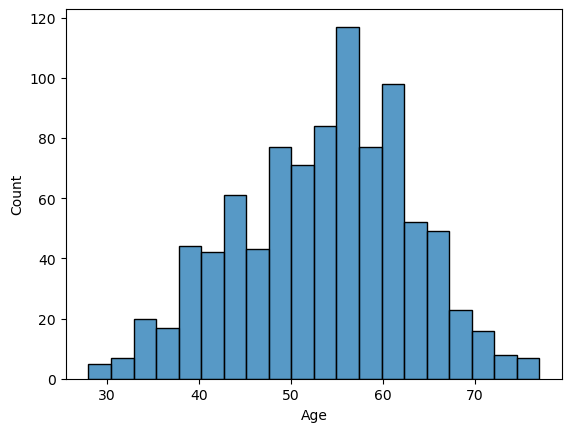

In [88]:
# Histogram for numeric features
sns.histplot(data=df['Age'],bins=20)

<Axes: xlabel='RestingBP', ylabel='Count'>

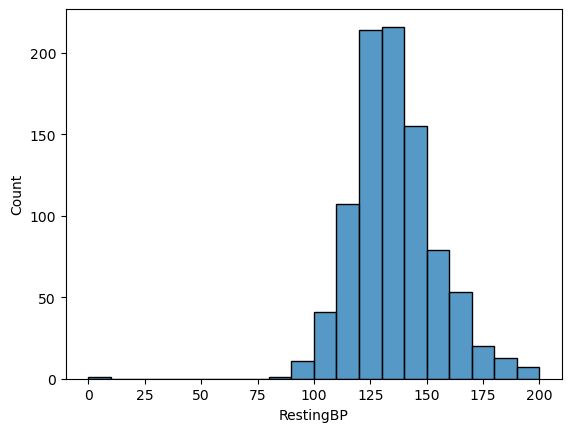

In [89]:
sns.histplot(data=df['RestingBP'],bins=20)

<Axes: xlabel='Cholesterol', ylabel='Count'>

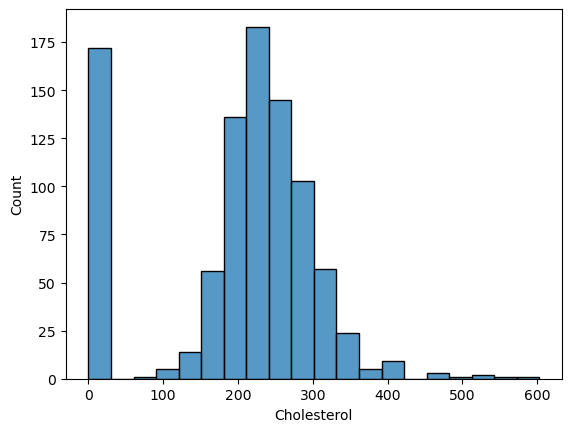

In [90]:
sns.histplot(data=df['Cholesterol'],bins=20)

<Axes: ylabel='Count'>

<Figure size 640x480 with 0 Axes>

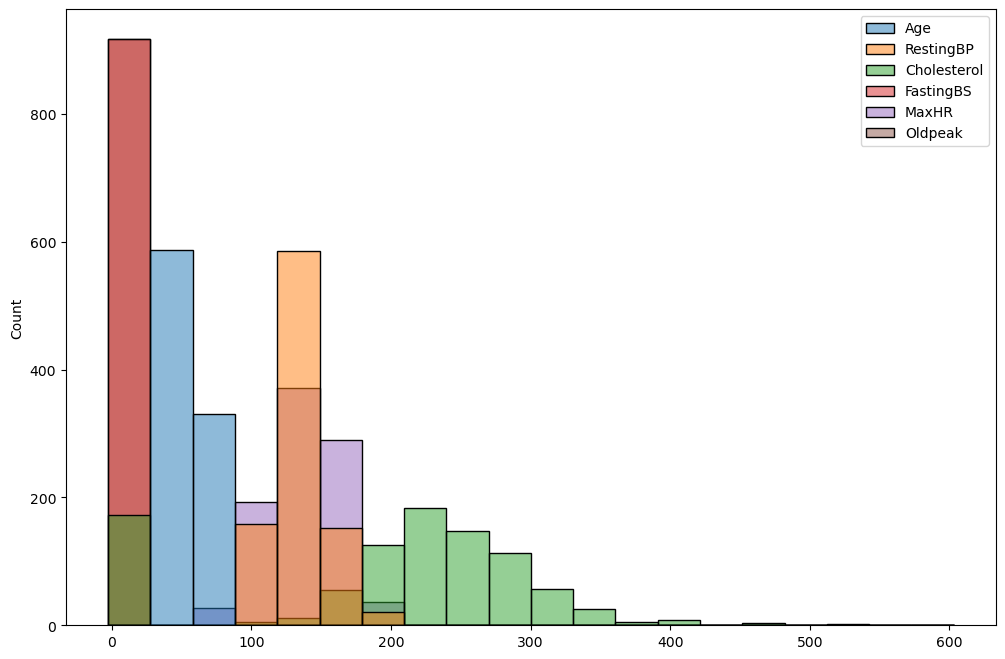

In [91]:
plt.tight_layout()
plt.figure(figsize=(12,8))
sns.histplot(data=df[numeric_cols],bins=20)

<Axes: >

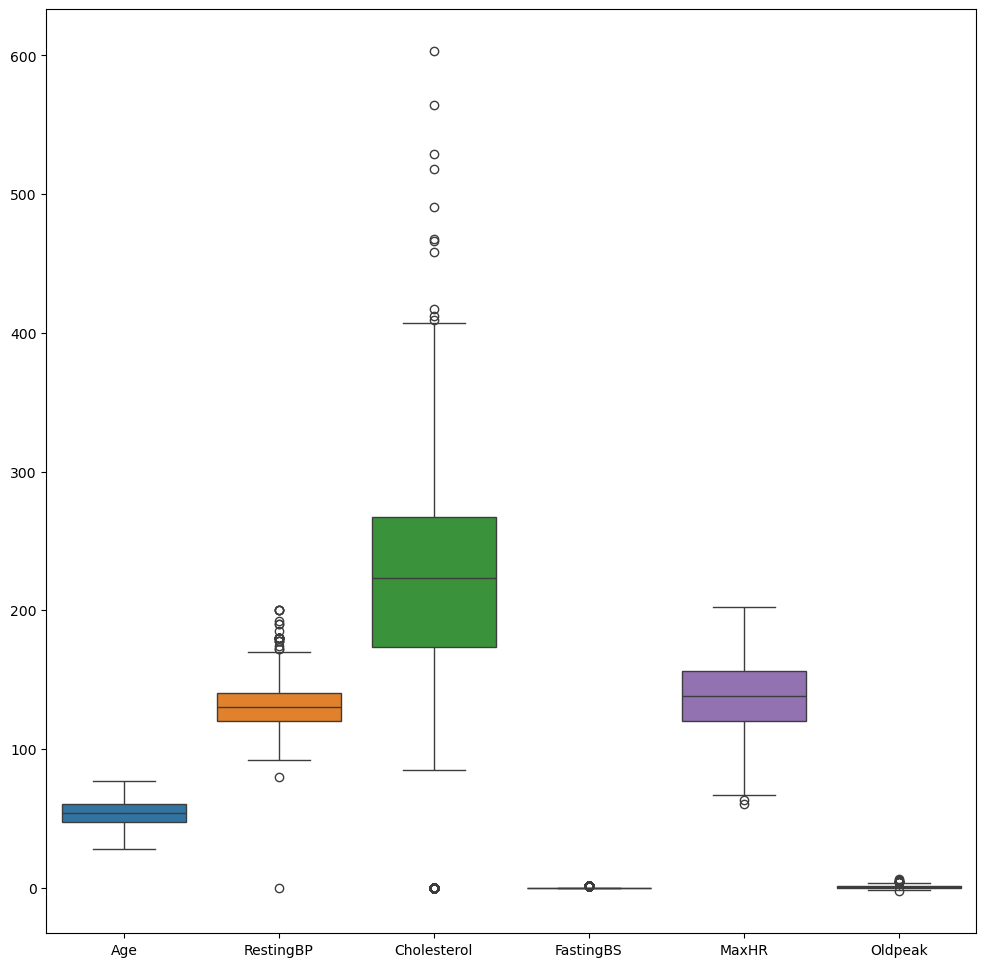

In [92]:
plt.figure(figsize=(12,12))
sns.boxplot(data=df[numeric_cols])

# boxplot is not perfect for 0 and 1.

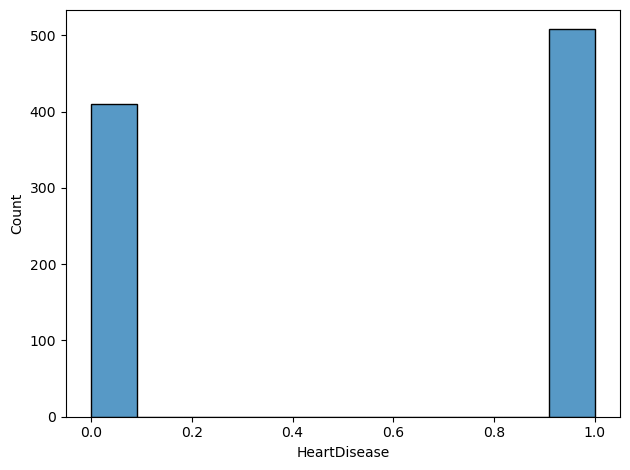

In [93]:
# target distribution
sns.histplot(data=df[target_col])
plt.tight_layout()
plt.show()

In [94]:
df[target_col].value_counts(normalize=True)

HeartDisease
1    0.553377
0    0.446623
Name: proportion, dtype: float64

Sex  ChestPainType  RestingECG  ExerciseAngina  ST_Slope
M    ASY            Normal      Y               Flat        0.118736
     ATA            Normal      N               Up          0.069717
     ASY            Normal      N               Flat        0.059913
                    ST          Y               Flat        0.053377
     NAP            Normal      N               Up          0.050109
                                                              ...   
     TA             LVH         Y               Flat        0.001089
                                                Up          0.001089
                    Normal      Y               Up          0.001089
                    ST          N               Down        0.001089
                                Y               Flat        0.001089
Name: proportion, Length: 95, dtype: float64

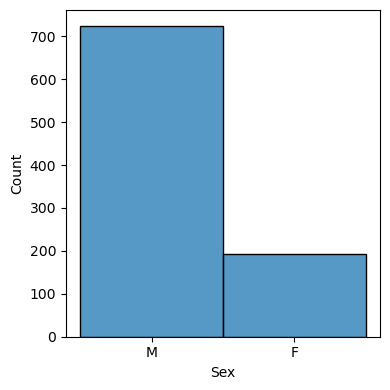

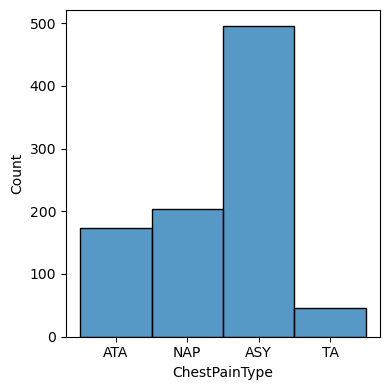

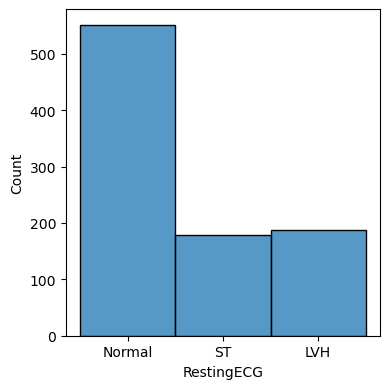

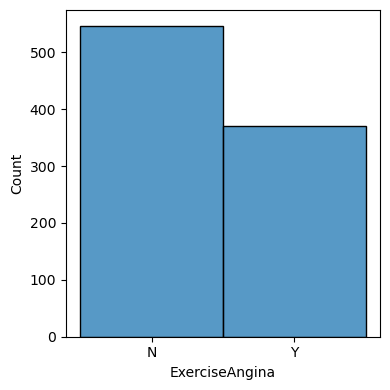

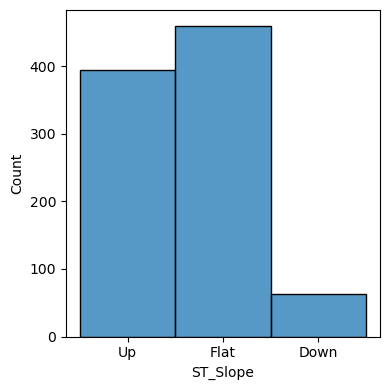

In [95]:
for c in categorical_cols:
    plt.figure(figsize=(4,4))
    sns.histplot(data=df[c])
    plt.tight_layout()
df[categorical_cols].value_counts(normalize=True).T

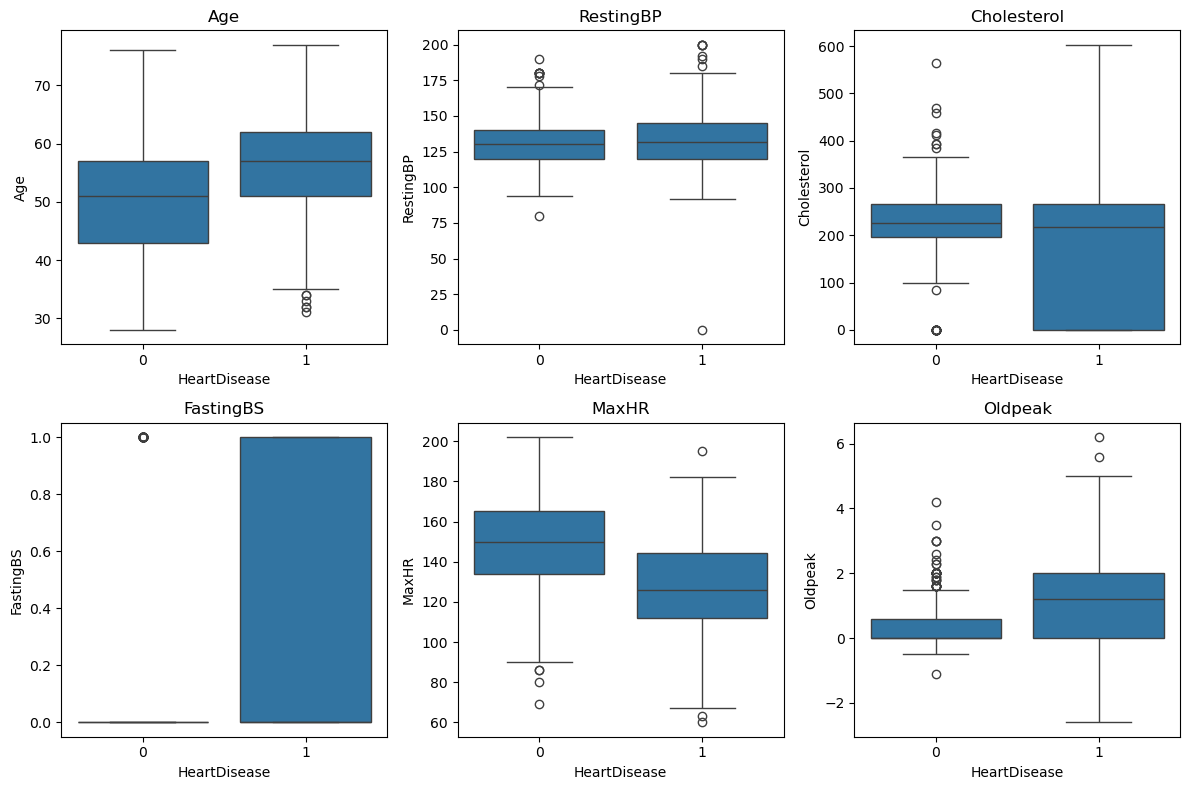

In [96]:
# Relationship between Features and Target
plt.figure(figsize=(12,8))
for i,col in enumerate(numeric_cols,1):
    plt.subplot(2,3,i)
    sns.boxplot(x=df[target_col],y=df[col])
    plt.title(col)

plt.tight_layout()
plt.show()
    

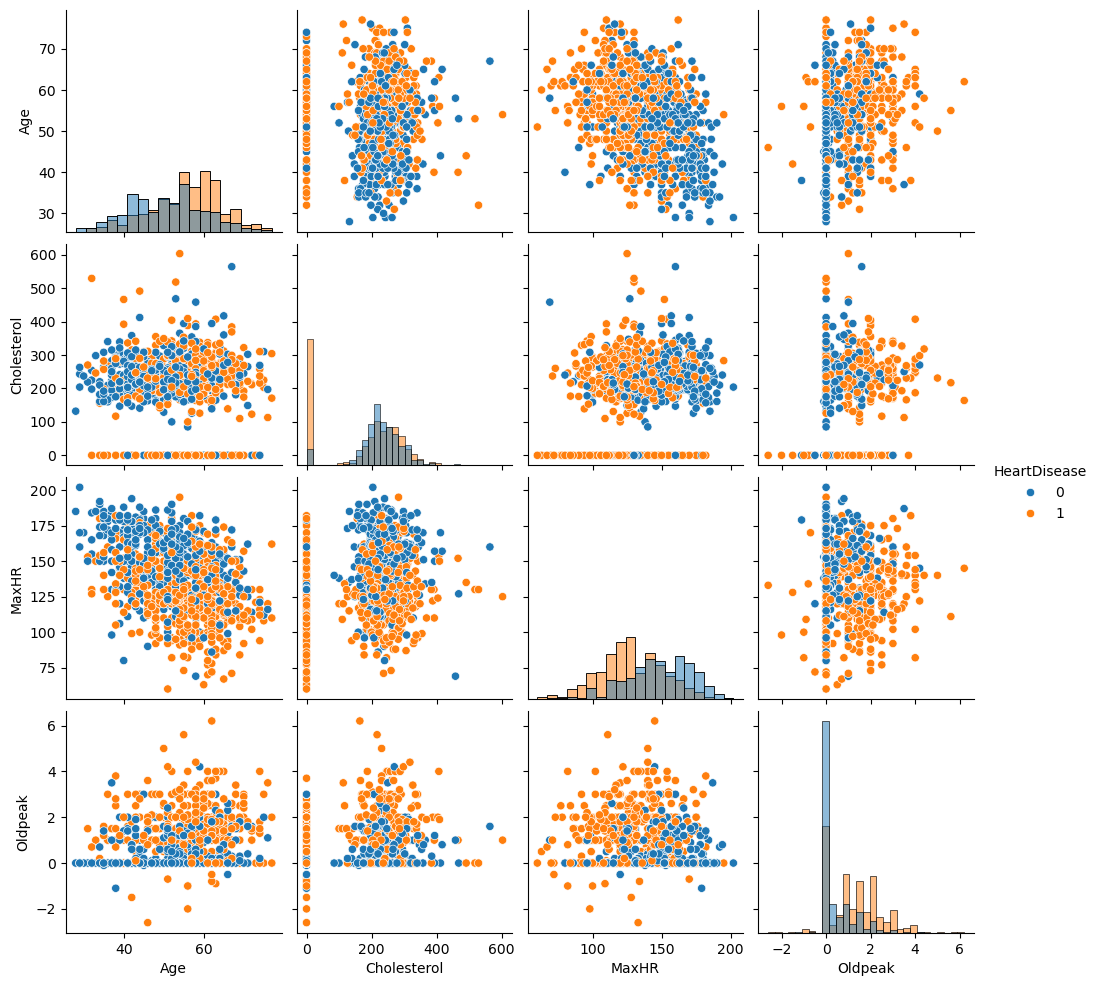

In [97]:
sns.pairplot(data=df[['Age','Cholesterol','MaxHR','Oldpeak','HeartDisease']],hue='HeartDisease',diag_kind='hist')
plt.show()

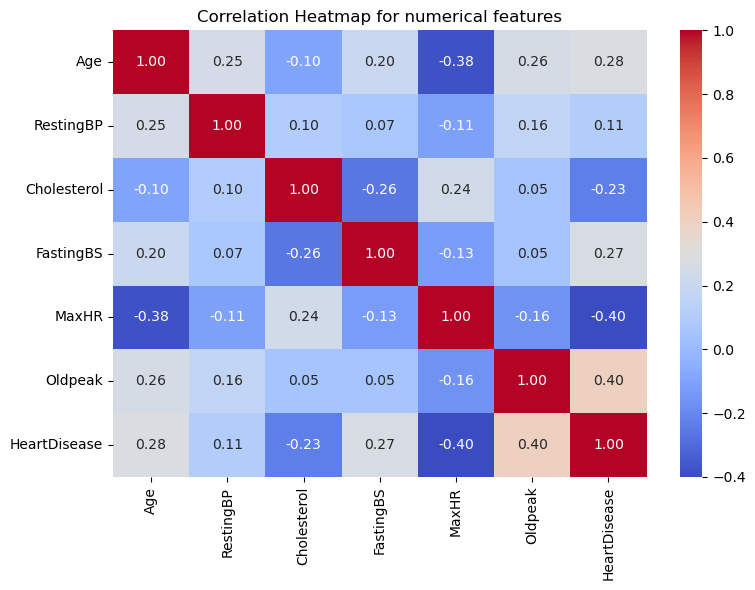

In [98]:
# Correlation matrix and heatmap
corr_matrix=df[numeric_cols+[target_col]].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm',fmt='.2f')
plt.title("Correlation Heatmap for numerical features")
plt.tight_layout()
plt.show()


In [99]:
corr_matrix[target_col].sort_values(ascending=False)

HeartDisease    1.000000
Oldpeak         0.403951
Age             0.282039
FastingBS       0.267291
RestingBP       0.107589
Cholesterol    -0.232741
MaxHR          -0.400421
Name: HeartDisease, dtype: float64

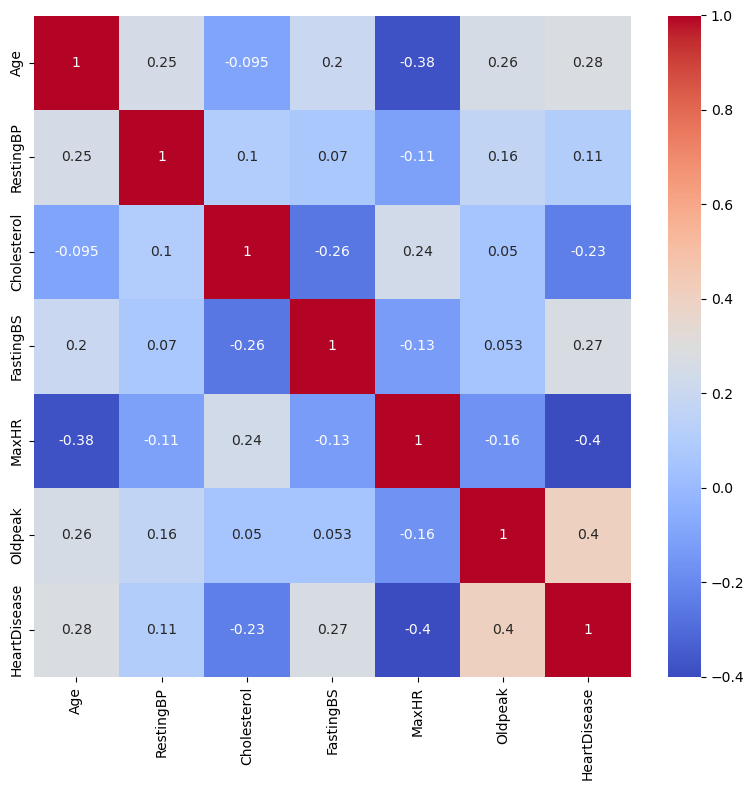

In [100]:
plt.figure(figsize=(8,8))
sns.heatmap(corr_matrix,cmap='coolwarm',annot=True)
plt.tight_layout()
plt.show()

HeartDisease,0,1
Sex,,
F,0.740933,0.259067
M,0.368276,0.631724


HeartDisease,0,1
ChestPainType,,
ASY,0.209677,0.790323
ATA,0.861272,0.138728
NAP,0.645320,0.354680
TA,0.565217,0.434783


HeartDisease,0,1
RestingECG,,
LVH,0.436170,0.563830
Normal,0.483696,0.516304
ST,0.342697,0.657303


HeartDisease,0,1
ExerciseAngina,,
N,0.648995,0.351005
Y,0.148248,0.851752


HeartDisease,0,1
ST_Slope,,
Down,0.222222,0.777778
Flat,0.171739,0.828261
Up,0.802532,0.197468


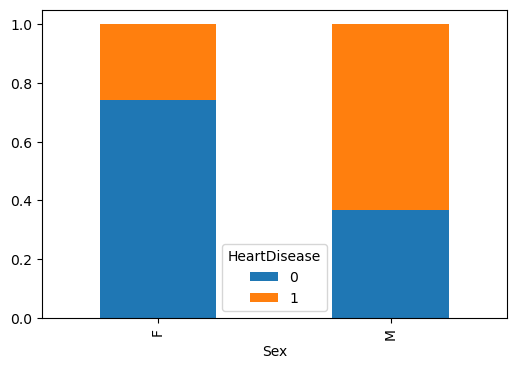

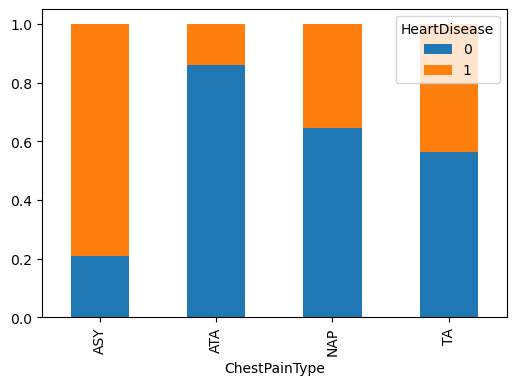

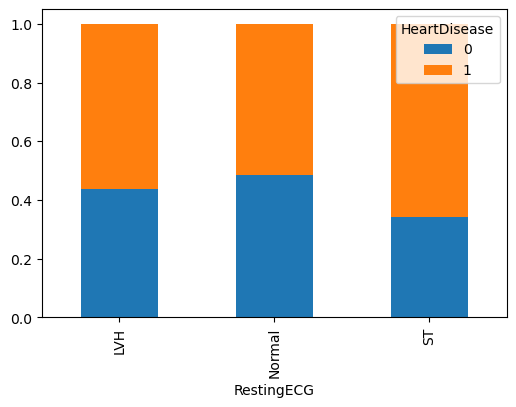

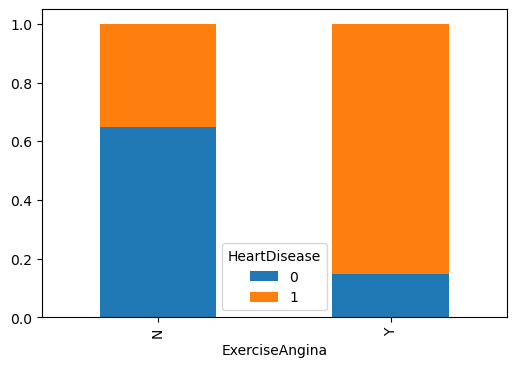

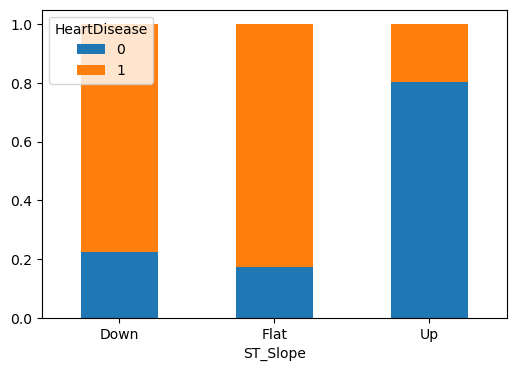

In [101]:
# Categorical features vs target
for c in categorical_cols:
    ct=pd.crosstab(df[c],[df[target_col]],normalize="index")
    display(ct)
    ct.plot(kind="bar",stacked=True,figsize=(6,4))

plt.xticks(rotation=0)
plt.show()